In [ ]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
##import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.7 MB/s eta 0:00:00


In [ ]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("crypto_market_data.csv",index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:
# Generate summary statistics
df_describe = df_market_data.describe()
df_describe
#df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [ ]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line("coin_id", "price_change_percentage_24h",
  width=800,
  height=400,
  rot=90
)
##df_market_data.plot(df_market_data.index, "price_change_percentage_24h",

ValueError: ignored

---

### Prepare the Data

In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_df_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y']])

In [ ]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(market_df_scaled, columns=['price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y'])
# Copy the crypto names from the original data
df_market_scaled.insert(0,'coin_id',df_market_data.index)
# Set the coinid column as index
df_market_scaled = df_market_scaled.set_index("coin_id")



In [ ]:

# Display sample data
df_market_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_list = list(range(1,11))

In [ ]:
# Create an empty list to store the inertia values
inertia_vals = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k_list:
    k_model = KMeans(n_clusters=i)
    k_model.fit(df_market_scaled)
    inertia_vals.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_list, "inertia": inertia_vals}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

<Axes: xlabel='k'>

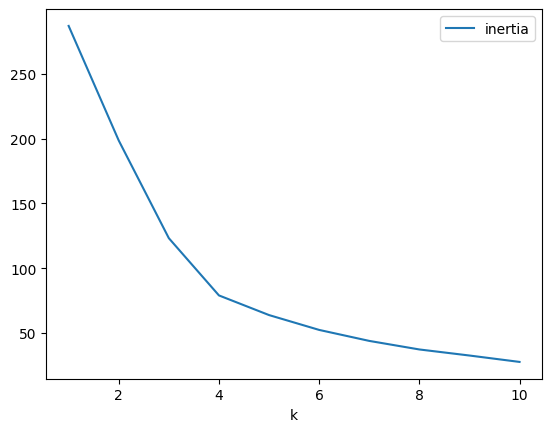

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot("k", "inertia")

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 6

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [ ]:
# Initialize the K-Means model using the best value for k
k3 = KMeans(n_clusters=6)

In [ ]:
# Fit the K-Means model using the scaled data
k3.fit(df_market_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = k3.predict(df_market_scaled)

# Print the resulting array of cluster values.
print(crypto_clusters)

[4 4 0 0 4 4 4 4 0 0 5 0 0 4 0 0 5 0 4 0 5 4 5 0 0 0 0 5 4 2 0 0 1 0 5 5 3
 5 0 0 5]


In [ ]:
# Create a copy of the DataFrame
df_market_scaled_predict = df_market_scaled.copy()

In [ ]:
# Add a new column to the DataFrame with the predicted clusters
df_market_scaled_predict['CryptoClusters'] = crypto_clusters

# Display sample data
df_market_scaled_predict.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoClusters
coin_id,,,,,,,,
omisego,1.919812,0.370447,-1.619761,-0.409716,1.696480,0.811207,-0.021888,5
binance-usd,0.061339,-0.706669,-0.015321,-0.058694,0.004017,-0.550003,-0.281963,0
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625,1
tezos,-0.151583,0.708196,0.258012,-0.602296,-0.956049,-0.449211,-0.168479,0
maker,-0.125168,0.580730,-0.202356,0.582911,-0.395923,-0.358240,-0.273433,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
zcash,-0.127467,0.929119,0.677532,0.223834,-0.437068,-0.265163,-0.214829,4
tron,0.130050,-0.041018,0.147155,-0.543776,0.120116,-0.241118,-0.234014,0
bitcoin-cash-sv,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

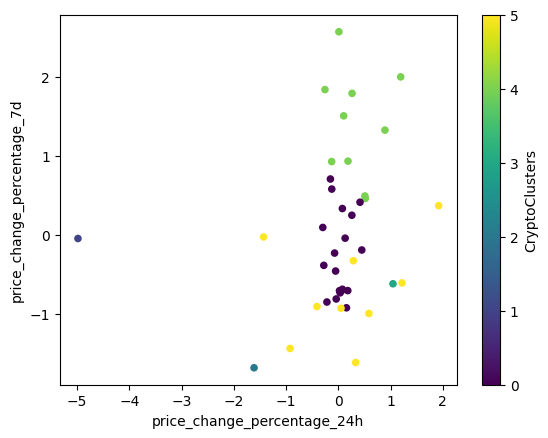

In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_scaled_predict.plot.scatter(x="price_change_percentage_24h",
                                      y="price_change_percentage_7d",
                                      c='CryptoClusters',
                                      colormap='viridis'
                                      )

---

### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.


In [ ]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.

# View the first five rows of the DataFrame.


In [ ]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**

In [ ]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11


In [ ]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [ ]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k


In [ ]:
# Fit the K-Means model using the PCA data

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [ ]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**